In [15]:
import decotools as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage import io

%matplotlib inline

### Get image file and extract blobs

Get a list of iOS image files

In [14]:
files = dt.get_iOS_files(start_date='2017.04.01', end_date='2017.05.05', verbose=1, phone_model='iPhone 7')

Found 1075 iOS image files


Pick out one of the files for blob extraction 

In [52]:
image_file = files[5]
# image_file = '/net/deco/iOSdata/2016.10.25/i3CB0CE68-95B9-4585-AC48-05AFD0BF3C0A_20161025_033757.90868.png'
# image_file = '/net/deco/iOSdata/2017.05.01/iF216114B-8710-4790-A05D-D645C9C79C27_20170501_065149.47923.png'
# image_file = '/net/deco/iOSdata/2017.05.01/iF216114B-8710-4790-A05D-D645C9C79C27_20170501_051050.52887.png'

Use `extract_blobs` to extract useful information about the blobs in `image_file`

In [58]:
df = dt.extract_blobs(image_file)

In [59]:
df

,area,bbox,bbox_area,centroid,convex_area,convex_image,coords,eccentricity,equivalent_diameter,euler_number,...,moments_normalized,n_blobs,orientation,perimeter,solidity,weighted_centroid,weighted_moments,weighted_moments_central,weighted_moments_hu,weighted_moments_normalized
0,14,"(1, 2, 6, 8)",64,"(3.21428571429, 4.78571428571)",18,"[[False, False, False, True, True, False], [Fa...","[[1, 5], [1, 6], [2, 5], [2, 6], [3, 5], [3, 6...",0.844638,4.222008,1,...,"[[nan, nan, 0.114067055394, -0.0156950583547],...",1,0.711084,11.828427,0.777778,"(3.28366762178, 4.80515759312)","[[349.0, 797.0, 2329.0, 7343.0], [979.0, 1929....","[[349.0, -4.26325641456e-14, 508.916905444, -3...","[0.00932395975219, 2.62998086419e-05, 2.236446...","[[nan, nan, 0.00417826541198, -0.0001318678002..."
1,14,"(1, 2, 6, 8)",56,"(2.92857142857, 4.07142857143)",16,"[[False, False, False, True, True, True], [Fal...","[[1, 6], [1, 7], [2, 3], [2, 4], [2, 5], [2, 6...",0.939928,4.222008,1,...,"[[nan, nan, 0.116982507289, 0.00534299858884],...",1,0.690974,12.449747,0.875000,"(2.95114942529, 4.04022988506)","[[348.0, 679.0, 1875.0, 5887.0], [710.0, 869.0...","[[348.0, 7.1054273576e-14, 550.16954023, 81.66...","[0.0108634423457, 7.58663334474e-05, 1.7997317...","[[nan, nan, 0.00454295101921, 3.61500082009e-0..."
2,13,"(1, 2, 5, 6)",36,"(2.76923076923, 3.38461538462)",14,"[[False, True, True, False], [True, True, True...","[[1, 3], [1, 4], [2, 2], [2, 3], [2, 4], [3, 2...",0.417563,4.068429,1,...,"[[nan, nan, 0.0846609012289, -0.00809880542789...",1,-1.030377,10.828427,0.928571,"(2.696875, 3.378125)","[[320.0, 543.0, 1265.0, 3225.0], [441.0, 770.0...","[[320.0, 3.90798504668e-14, 343.596875, -87.62...","[0.00625823974609, 3.84148303419e-07, 5.533269...","[[nan, nan, 0.00335543823242, -4.78378626603e-..."
3,17,"(0, 0, 6, 7)",49,"(2.29411764706, 3.05882352941)",28,"[[True, True, True, True, False, False, False]...","[[0, 0], [0, 1], [1, 0], [1, 3], [1, 4], [1, 5...",0.583444,4.652426,1,...,"[[nan, nan, 0.136779971504, 0.0148446751737], ...",1,-0.392699,16.621320,0.607143,"(2.33756345178, 3.10152284264)","[[394.0, 921.0, 3101.0, 12075.0], [1222.0, 302...","[[394.0, 1.42108547152e-14, 948.104060914, 393...","[0.0141335975367, 8.17252881924e-06, 2.0766055...","[[nan, nan, 0.00610750122983, 0.00012777171224..."
4,14,"(1, 4, 9, 7)",90,"(4.07142857143, 5.21428571429)",16,"[[False, False, True], [False, True, True], [T...","[[1, 6], [2, 5], [2, 6], [3, 4], [3, 5], [3, 6...",0.940123,4.222008,1,...,"[[nan, nan, 0.259839650146, 0.0601087341244], ...",1,1.477349,12.035534,0.875000,"(3.92896174863, 5.20218579235)","[[366.0, 1072.0, 4362.0, 21238.0], [440.0, 119...","[[366.0, -1.13686837722e-13, 1222.15300546, 13...","[0.0104152949986, 6.35103259126e-05, 4.2283447...","[[nan, nan, 0.00912354060635, 0.00050828236397..."


### Look at blobs
Plot a grid of the blobs found in `image_file`

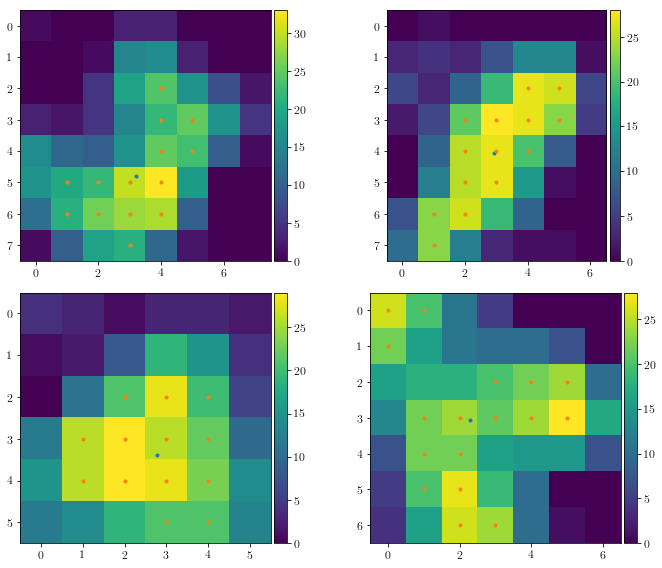

In [60]:
# Display the image and plot all contours found
fig, axarr = plt.subplots(2, 2, figsize=(20, 8))
for idx, ax in enumerate(axarr.flatten()):
    io.imshow(df['image'][idx], ax=ax)
    ax.plot(df['centroid'][idx][0], df['centroid'][idx][1])
    ax.plot(df['coords'][idx][:, 0], df['coords'][idx][:, 1], ls='None')
plt.tight_layout()
plt.show()